# 01 – Data Overview
Orient new readers by inspecting the full play-by-play export, validating schema integrity, and previewing high-level patterns before any modeling.

Running this notebook first ensures downstream notebooks operate on a clean, fully-understood dataset.


In [10]:
import sys
from pathlib import Path

def _find_project_root(start: Path) -> Path:
    for candidate in (start, *start.parents):
        if (candidate / 'src').is_dir():
            return candidate
    raise RuntimeError("Could not locate project root containing a 'src' directory.")

PROJECT_ROOT = _find_project_root(Path.cwd())
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))


In [11]:
import pandas as pd
from src.data.ingest import load_play_by_play, example_path

pbp = load_play_by_play(example_path())
pbp.head()

,season_id,edition_id,game_id,action_number,period,home_score,away_score,remaining_period_time,type,player_id,...,h1,h2,h3,h4,h5,a1,a2,a3,a4,a5
0,20-21,20-21 EL,2020-10-01:Anadolu Efes Istanbul-Zenit St Pete...,1,1,0,0,600.0,GS,NaN,...,Bryant Dunston,Chris Singleton,James Anderson,Krunoslav Simon,Vasilije Micic,Alex Poythress,Austin Hollins,Kc Rivers,Kevin Pangos,Will Thomas
1,20-21,20-21 EL,2020-10-01:Anadolu Efes Istanbul-Zenit St Pete...,2,1,0,0,600.0,PS,NaN,...,Bryant Dunston,Chris Singleton,James Anderson,Krunoslav Simon,Vasilije Micic,Alex Poythress,Austin Hollins,Kc Rivers,Kevin Pangos,Will Thomas
2,20-21,20-21 EL,2020-10-01:Anadolu Efes Istanbul-Zenit St Pete...,3,1,0,0,600.0,JB,Bryant Dunston,...,Bryant Dunston,Chris Singleton,James Anderson,Krunoslav Simon,Vasilije Micic,Alex Poythress,Austin Hollins,Kc Rivers,Kevin Pangos,Will Thomas
3,20-21,20-21 EL,2020-10-01:Anadolu Efes Istanbul-Zenit St Pete...,4,1,0,0,600.0,JB,Alex Poythress,...,Bryant Dunston,Chris Singleton,James Anderson,Krunoslav Simon,Vasilije Micic,Alex Poythress,Austin Hollins,Kc Rivers,Kevin Pangos,Will Thomas
4,20-21,20-21 EL,2020-10-01:Anadolu Efes Istanbul-Zenit St Pete...,5,1,0,0,599.0,JBW,NaN,...,Bryant Dunston,Chris Singleton,James Anderson,Krunoslav Simon,Vasilije Micic,Alex Poythress,Austin Hollins,Kc Rivers,Kevin Pangos,Will Thomas


In [12]:
pbp.info()
pbp.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828504 entries, 0 to 828503
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   season_id              828504 non-null  object 
 1   edition_id             828504 non-null  object 
 2   game_id                828504 non-null  object 
 3   action_number          828504 non-null  int64  
 4   period                 828504 non-null  int64  
 5   home_score             828504 non-null  int64  
 6   away_score             828504 non-null  int64  
 7   remaining_period_time  828504 non-null  float64
 8   type                   828504 non-null  object 
 9   player_id              782089 non-null  object 
 10  team_id                808855 non-null  object 
 11  opponent_id            808855 non-null  object 
 12  x                      194775 non-null  float64
 13  y                      194775 non-null  float64
 14  details                62881 non-nul

,season_id,edition_id,game_id,action_number,period,home_score,away_score,remaining_period_time,type,player_id,...,h1,h2,h3,h4,h5,a1,a2,a3,a4,a5
count,828504,828504,828504,828504.000000,828504.000000,828504.000000,828504.000000,828504.000000,828504,782089,...,828504,828504,828504,828504,828504,828504,828504,828504,828504,828504
unique,6,6,1592,NaN,NaN,NaN,NaN,NaN,25,720,...,402,477,494,480,385,411,461,494,478,383
top,23-24,23-24 EL,2024-01-05:Real Madrid-Anadolu Efes Istanbul,NaN,NaN,NaN,NaN,NaN,IN,Mike James,...,Alpha Diallo,Edgaras Ulanovas,Nick Calathes,Lorenzo Brown,Wade Baldwin,Adam Hanga,Edgaras Ulanovas,Rodrigue Beaubois,Shane Larkin,Walter Tavares
freq,172747,172747,738,NaN,NaN,NaN,NaN,NaN,89365,7681,...,19873,14426,12903,17404,27287,18572,12601,12442,16245,27227
mean,NaN,NaN,NaN,262.195217,2.566276,42.052320,40.130977,283.674599,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,152.869581,1.129899,24.429147,23.524249,180.450073,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,-1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,131.000000,2.000000,22.000000,20.000000,127.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,261.000000,3.000000,42.000000,39.000000,276.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,391.000000,4.000000,62.000000,59.000000,435.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset snapshot
Season coverage, period cadence, event mix, and scoring dynamics computed over the full table.

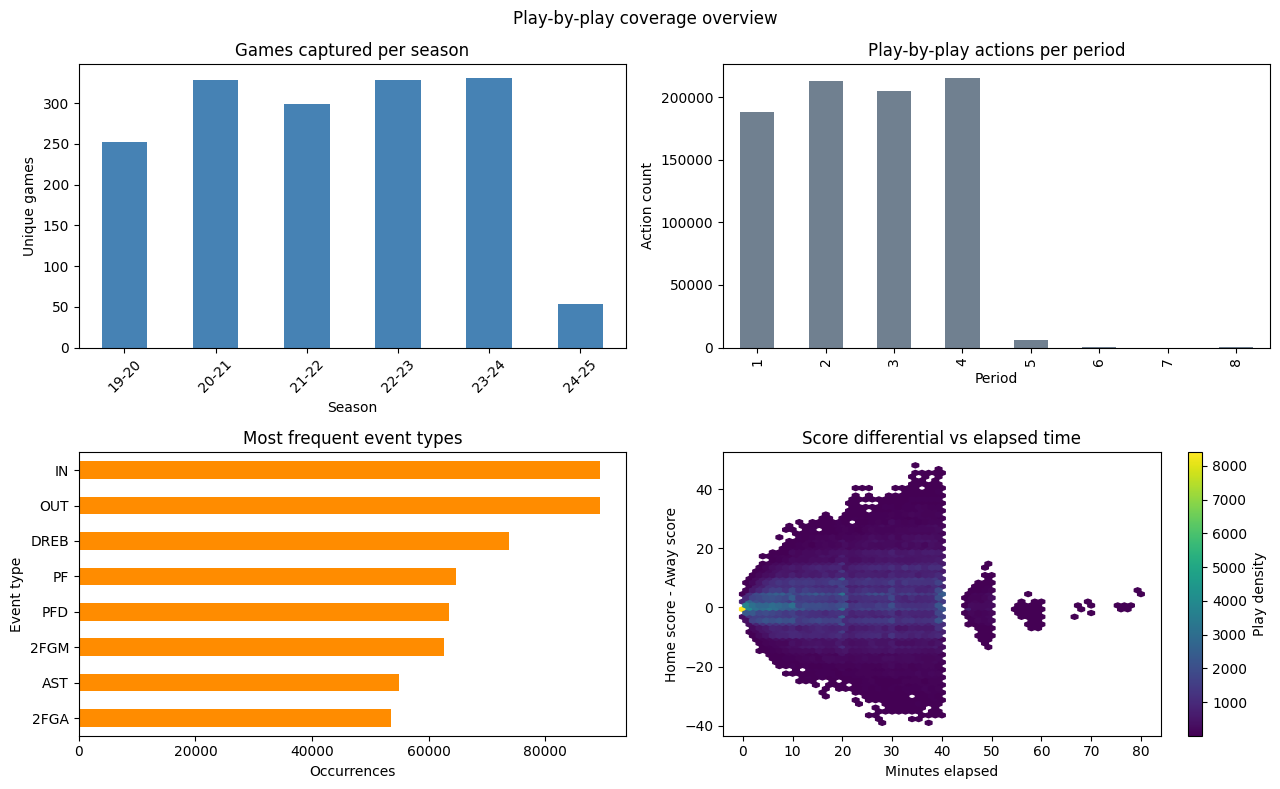

In [13]:
import matplotlib.pyplot as plt
import numpy as np

games_per_season = (
    pbp.groupby('season_id')['game_id']
    .nunique()
    .sort_index()
)
plays_per_period = pbp.groupby('period').size().sort_index()
top_events = (
    pbp['type']
    .value_counts()
    .head(8)
    .sort_values()
)
score_diff = pbp['home_score'] - pbp['away_score']
elapsed_minutes = ((pbp['period'] - 1) * 600 + (600 - pbp['remaining_period_time'])) / 60

fig, axes = plt.subplots(2, 2, figsize=(13, 8))
games_per_season.plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Games captured per season')
axes[0, 0].set_ylabel('Unique games')
axes[0, 0].set_xlabel('Season')
for tick in axes[0, 0].get_xticklabels():
    tick.set_rotation(45)

plays_per_period.plot(kind='bar', ax=axes[0, 1], color='slategray')
axes[0, 1].set_title('Play-by-play actions per period')
axes[0, 1].set_xlabel('Period')
axes[0, 1].set_ylabel('Action count')

top_events.plot(kind='barh', ax=axes[1, 0], color='darkorange')
axes[1, 0].set_title('Most frequent event types')
axes[1, 0].set_xlabel('Occurrences')
axes[1, 0].set_ylabel('Event type')

hb = axes[1, 1].hexbin(
    elapsed_minutes,
    score_diff,
    gridsize=60,
    cmap='viridis',
    mincnt=5,
)
axes[1, 1].set_title('Score differential vs elapsed time')
axes[1, 1].set_xlabel('Minutes elapsed')
axes[1, 1].set_ylabel('Home score - Away score')
cbar = fig.colorbar(hb, ax=axes[1, 1], label='Play density')

fig.suptitle('Play-by-play coverage overview', y=0.98)
fig.tight_layout()


## Notes
- Keep your master CSV at `data/raw/play_by_play_combined.csv` (or adjust `RAW_PBP_PATH`) so every notebook references the same source of truth.
- Consider extending the visual overview with team- or season-specific cuts if you hand this notebook to stakeholders.
